In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thousand-ml-jobs-in-usa/1000_ml_jobs_us.csv


In [46]:
import pandas as pd
df=pd.read_csv("/kaggle/input/thousand-ml-jobs-in-usa/1000_ml_jobs_us.csv")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                997 non-null    int64 
 1   job_posted_date           997 non-null    object
 2   company_address_locality  950 non-null    object
 3   company_address_region    884 non-null    object
 4   company_name              997 non-null    object
 5   company_website           983 non-null    object
 6   company_description       985 non-null    object
 7   job_description_text      996 non-null    object
 8   seniority_level           988 non-null    object
 9   job_title                 997 non-null    object
dtypes: int64(1), object(9)
memory usage: 78.0+ KB


In [48]:
df.head()


,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
0,0,2024-10-31,Indianapolis,Indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...
1,1,2025-03-14,San Francisco,California,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
2,2,2025-04-09,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer
3,3,2025-03-22,Mountain View,California,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,"Machine Learning Engineer, Training"
4,4,2025-03-28,Boston,Massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer


In [49]:
adobe_jobs = df[(df['company_name'] == 'Adobe')& (df['seniority_level']=='Internship')]
adobe_jobs=adobe_jobs.reset_index(drop=True)
adobe_jobs.index+=1
adobe_jobs


,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
1,5,2025-04-02,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Internship,2025 Intern - Machine Learning Engineer AI/ML
2,24,2025-03-31,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Internship,2025 Intern CV/ML - Machine Learning Engineer
3,28,2025-03-30,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Internship,2025 Intern - Machine Learning Engineer AI/ML
4,65,2025-04-05,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Internship,2025 AI/ML Intern - Machine Learning Engineer


In [50]:
internship = df[df['seniority_level'] == 'Internship']

internship=internship.reset_index(drop=True)
internship.index+=1
internship

,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
1,0,2024-10-31,Indianapolis,Indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...
2,5,2025-04-02,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Internship,2025 Intern - Machine Learning Engineer AI/ML
3,24,2025-03-31,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Internship,2025 Intern CV/ML - Machine Learning Engineer
4,28,2025-03-30,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Internship,2025 Intern - Machine Learning Engineer AI/ML
5,36,2025-04-02,Los Angeles,California,TikTok,https://www.tiktok.com/about?lang=en,TikTok is the world's leading destination for ...,ResponsibilitiesTikTok is the leading destinat...,Internship,(General Hire) Machine Learning Engineer Gradu...
...,...,...,...,...,...,...,...,...,...,...
66,965,2025-04-03,Omaha,Nebraska,Aviture,https://www.aviture.us.com,Unlock the Art of the Possible with Aviture. A...,What is Aviture?Aviture is a full-service tech...,Internship,Software Engineer Internship
67,976,2025-04-09,Camarillo,CA,Semtech,https://www.semtech.com,Semtech Corporation is a high-performance semi...,Location: US RemoteJob SummaryWe are seeking a...,Internship,Artificial Intelligence / Data Scientist Inter...
68,980,2025-04-04,Los Angeles,California,TikTok,https://www.tiktok.com/about?lang=en,TikTok is the world's leading destination for ...,ResponsibilitiesThe Business Risk Integrated C...,Internship,Machine Learning Engineer Intern (LLM Risk Sur...
69,981,2025-04-09,Camarillo,CA,Semtech,https://www.semtech.com,Semtech Corporation is a high-performance semi...,Location: US RemoteJob SummaryWe are seeking a...,Internship,Artificial Intelligence / Data Scientist Inter...


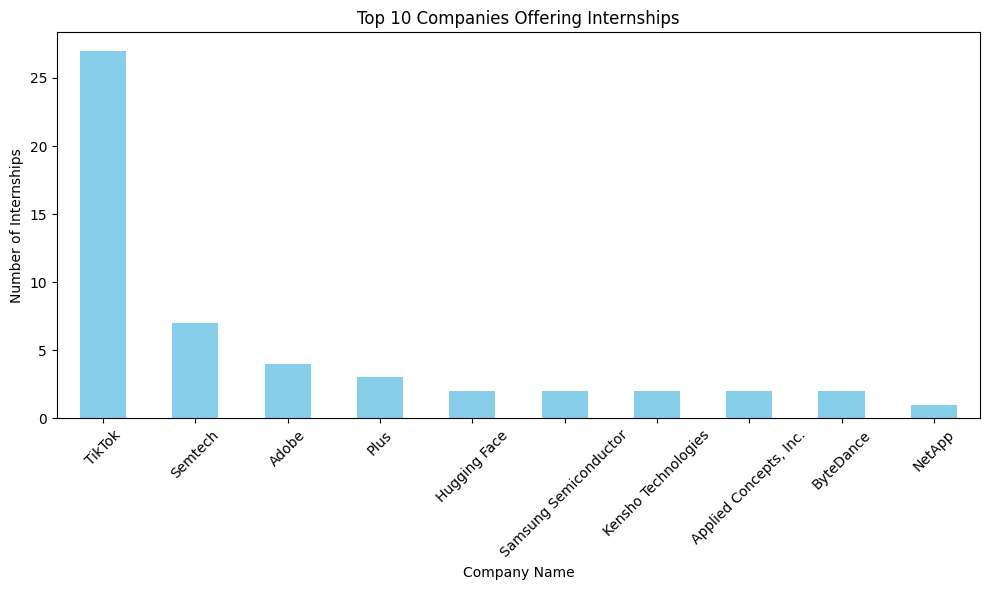

In [51]:
import matplotlib.pyplot as plt

intern_count = internship['company_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
intern_count.plot(kind='bar', color='skyblue')
plt.title('Top 10 Companies Offering Internships')
plt.xlabel('Company Name')
plt.ylabel('Number of Internships')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


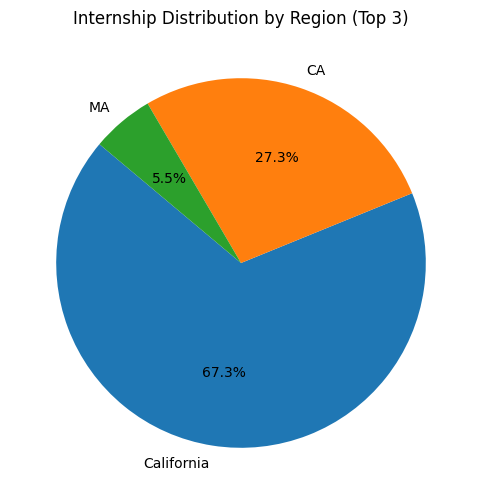

In [52]:
region_count = internship['company_address_region'].value_counts().head(3)

plt.figure(figsize=(6,6))
region_count.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Internship Distribution by Region (Top 3)')
plt.ylabel('')
plt.show()


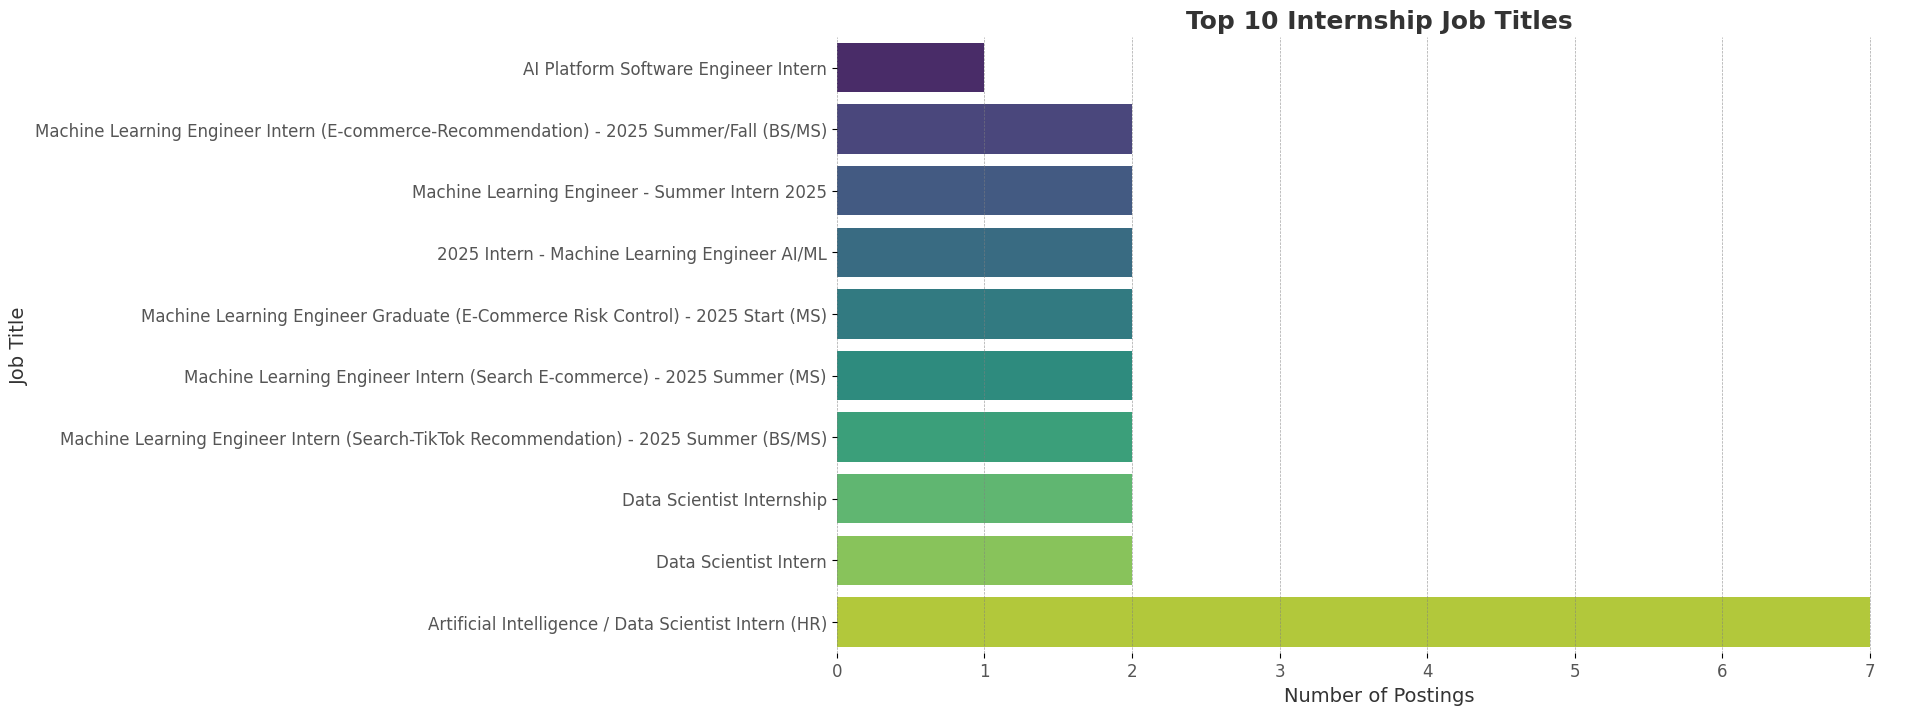

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
title_count = internship['job_title'].value_counts().head(10).sort_values()

# Plot with seaborn for a sleek, professional look
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=title_count.values, y=title_count.index, palette='viridis')


# Title and axis labels with professional font styling
plt.title('Top 10 Internship Job Titles', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Number of Postings', fontsize=14, color='#333333')
plt.ylabel('Job Title', fontsize=14, color='#333333')

# Styling for clarity and polish
sns.despine(left=True, bottom=True)  # Remove spines for a cleaner look
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

# Customize gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7, color='gray', linewidth=0.5)

# Ensure


In [54]:
df['seniority_level'].value_counts()


seniority_level
Mid-Senior level    371
Entry level         300
Not Applicable      209
Internship           70
Associate            32
Director              5
Executive             1
Name: count, dtype: int64

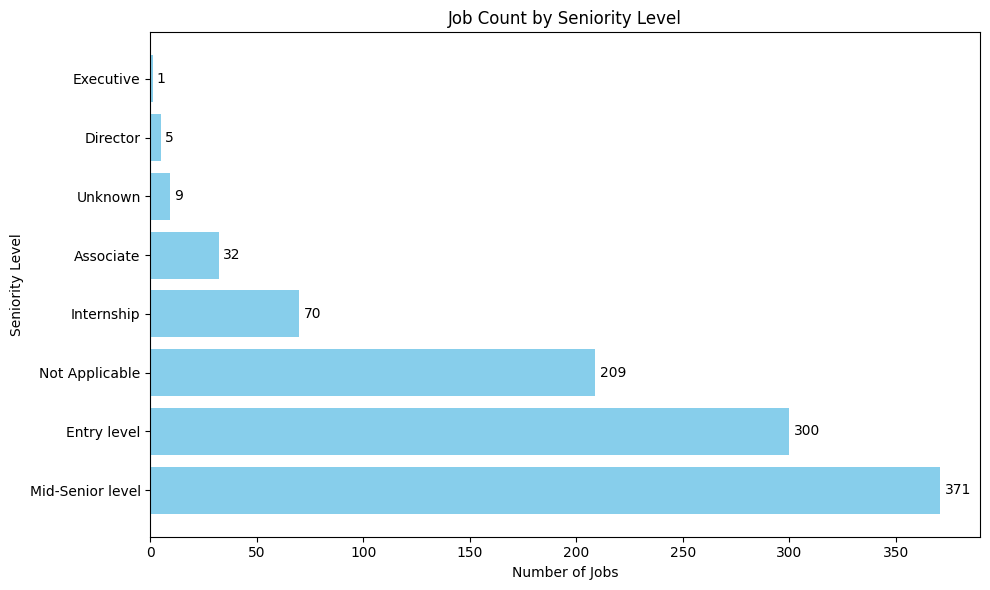

In [55]:
import matplotlib.pyplot as plt

# Prepare data
seniority_counts = df['seniority_level'].fillna('Unknown').value_counts()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(seniority_counts.index, seniority_counts.values, color='skyblue')
plt.title('Job Count by Seniority Level')
plt.xlabel('Number of Jobs')
plt.ylabel('Seniority Level')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 2, bar.get_y() + bar.get_height() / 2,
             str(int(width)),
             va='center')

plt.tight_layout()
plt.show()



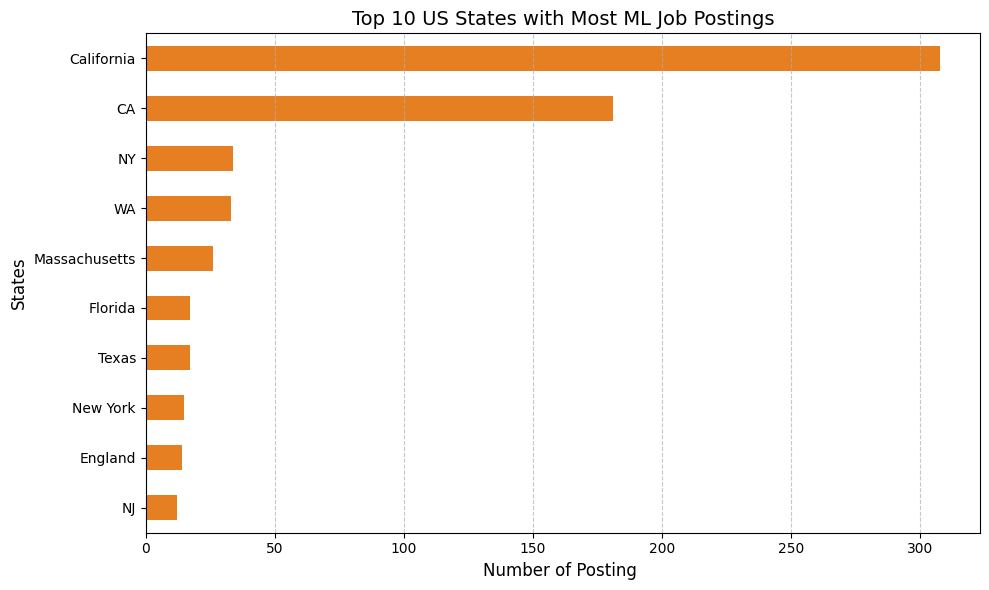

In [56]:
plt.figure(figsize=(10,6))
df['company_address_region'].value_counts().head(10).sort_values().plot(kind='barh',color='#e67e22')
plt.title('Top 10 US States with Most ML Job Postings',fontsize='14' )
plt.ylabel('States',fontsize='12')
plt.xlabel('Number of Posting ',fontsize='12')
plt.grid(axis='x',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()